In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import cProfile
import trace
from hypernetx import EntitySet

In [5]:
number_of_runs = 1000

n = 100
m = 1000

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]


In [6]:
# If you want a single-run comparison
start = time.time()
h1 = hnx.Hypergraph(hyperedgeList, static=False)
print(time.time() - start)

start = time.time()
h2 = hnx.Hypergraph(hyperedgeList, static=True)
print(time.time() - start)


0.0037097930908203125
0.010694742202758789


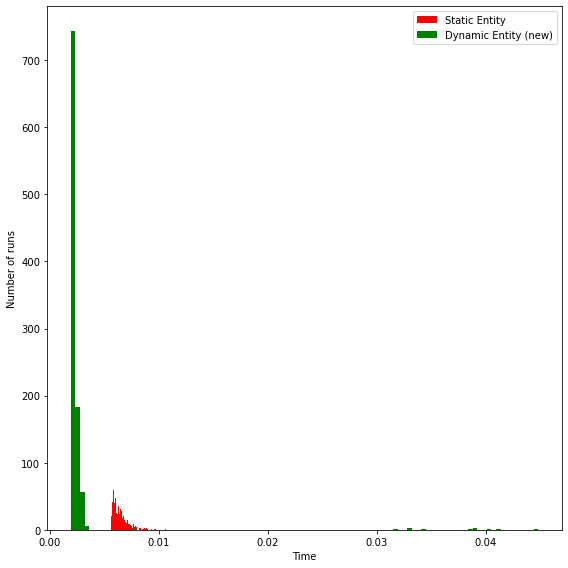

In [7]:
# Benchmark constructing a sparse incidence matrix, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    start = time.time()
    h = hnx.Hypergraph(hyperedgeList, static=True)
    timeStatic.append(time.time() - start)
    
    start = time.time()
    h = hnx.Hypergraph(hyperedgeList, static=False)
    timeDynamic.append(time.time() - start)

plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('construction_time_comparison.pdf',dpi=600)
plt.show()

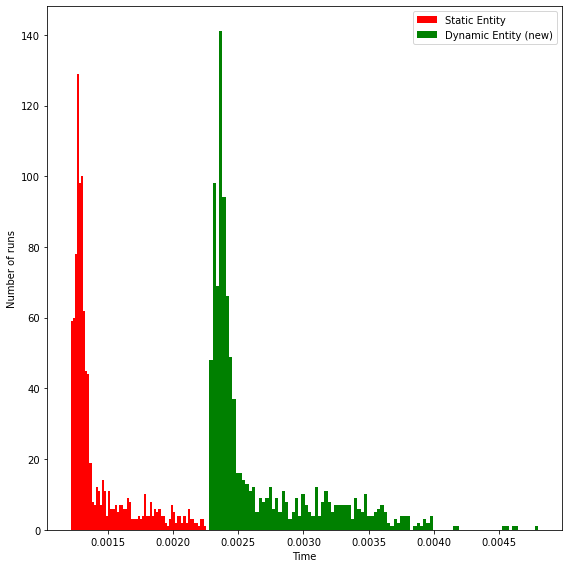

In [8]:
# Benchmark constructing a sparse incidence matrix, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    h = hnx.Hypergraph(hyperedgeList, static=True)
    start = time.time()
    h.incidence_matrix()
    timeStatic.append(time.time() - start)
    h = hnx.Hypergraph(hyperedgeList, static=False)
    start = time.time()
    h.incidence_matrix()
    timeDynamic.append(time.time() - start)

plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('incidence_matrix_time_comparison.pdf',dpi=600)
plt.show()

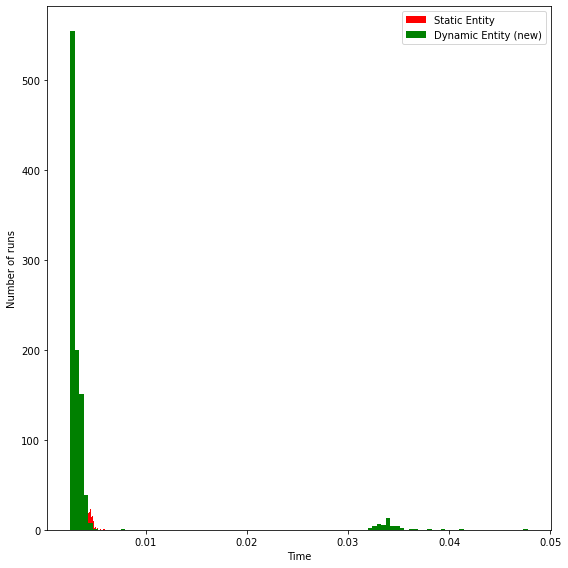

In [9]:
# Benchmark constructing the dual, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    h = hnx.Hypergraph(hyperedgeList, static=True)
    start = time.time()
    h.dual()
    timeStatic.append(time.time() - start)
    h = hnx.Hypergraph(hyperedgeList, static=False)
    start = time.time()
    h.dual()
    timeDynamic.append(time.time() - start)

plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('incidence_matrix_time_comparison.pdf',dpi=600)
plt.show()

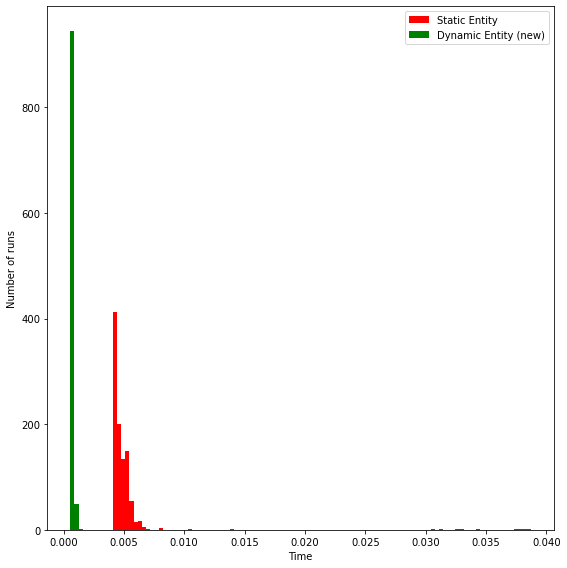

In [10]:
# Benchmark constructing a incidence dict, dynamic vs. static.
timeStatic = list()
timeDynamic = list()
for run in range(number_of_runs):
    h = hnx.Hypergraph(hyperedgeList, static=True)
    start = time.time()
    h.incidence_dict
    timeStatic.append(time.time() - start)
    h = hnx.Hypergraph(hyperedgeList, static=False)
    start = time.time()
    h.incidence_dict
    timeDynamic.append(time.time() - start)

plt.figure()
plt.hist(timeStatic, bins=100, color='red', density=False, label='Static Entity')
plt.hist(timeDynamic, bins=100, color='green', density=False, label='Dynamic Entity (new)')
plt.xlabel('Time')
plt.ylabel('Number of runs')
plt.legend()
plt.tight_layout()
plt.savefig('incidence_dict_time_comparison.pdf',dpi=600)
plt.show()